<a id="seccion-1"></a>

<h1 style="text-align: center; font-size: 70px; font-weight: 500;">Implementación y Análisis de MobileNet</h1>

- Autores: 
    - José Guillermo Sepúlveda Salazar.
    - Benjamín Omar Higuera Ossandón.

<a id="indice"></a>

## **Índice**
- [Portada](#seccion-1)
- [Introducción](#seccion-2)
- [Arquitectura de MobileNet](#seccion-3)
    - [Convolución Separable en Profundidad](#subseccion-3-1)
    - [Hiperparámetros de MobileNet](#subseccion-3-2)
- [Implementación](#seccion-4)
- [Aplicaciones de MobileNet](#seccion-5)
- [Análisis de Resultados](#seccion-6)


<a id="seccion-2"></a>

## **Introducción**
MobileNet es una arquitectura de red neuronal convolucional eficiente, diseñada para aplicaciones de visión en dispositivos móviles y embebidos. La arquitectura de MobileNet se basa en convoluciones separables en profundidad (depthwise separable convolutions), que permiten construir redes neuronales profundas ligeras y de baja latencia. MobileNet introduce dos hiperparámetros globales simples que permiten a los desarrolladores de modelos realizar un equilibrio eficiente entre latencia y precisión. Estos hiperparámetros permiten ajustar el tamaño del modelo según las restricciones del problema.

[Volver al índice](#indice)    

<a id="seccion-3"></a>

## **Arquitectura de MobileNet**

<a id="subseccion-3-1"></a>

### **I) Convolución Separable en Profundidad**
La arquitectura de MobileNet utiliza convoluciones separables en profundidad, que descomponen una convolución estándar en una convolución en profundidad y una convolución puntual (1x1). La convolución en profundidad aplica un filtro por cada canal de entrada, mientras que la convolución puntual combina los resultados de las convoluciones en profundidad. Esta factoración reduce drásticamente el costo computacional y el tamaño del modelo.

* **Convolución estándar:** Filtra y combina entradas en una nueva representación en un solo paso.
* **Convolución separable en profundidad:** Divide la operación en dos pasos, reduciendo la complejidad computacional.

<a id="subseccion-3-2"></a>

### **II) Hiperparámetros de MobileNet**
1. **Width Multiplier (𝛼):** Este parámetro ajusta el número de canales en cada capa, reduciendo el costo computacional y el número de parámetros de forma cuadrática.
2. **Resolution Multiplier (𝜌):** Este parámetro ajusta la resolución de la entrada y las representaciones internas, reduciendo el costo computacional al cuadrado del factor de resolución.

[Volver al índice](#indice)  

<a id="seccion-4"></a>

## **Implementación**
Para implementar MobileNet utilizando Keras, se sigue una serie de pasos que incluyen la configuración del modelo preentrenado con los hiperparámetros deseados y la preparación del conjunto de datos específico para la aplicación. Los siguientes son los componentes clave de la implementación:
1. **Carga del modelo preentrenado:** Keras proporciona una API para cargar modelos preentrenados, incluyendo MobileNet, con pesos preentrenados en el conjunto de datos ImageNet.
2. **Ajuste de los hiperparámetros:** Ajustar 𝛼 y 𝜌 según las necesidades de la aplicación para encontrar un balance entre precisión y eficiencia.
3. **Preprocesamiento de datos:** Preparar el conjunto de datos asignado, aplicando transformaciones necesarias para que coincidan con las expectativas del modelo.
4. **Evaluación del modelo:** Aplicar el modelo al conjunto de datos, obtener y analizar los resultados, y discutir las clases presentes en los datos.

[Volver al índice](#indice)  

<a id="seccion-5"></a>

## **Aplicaciones de MobileNet**
MobileNet ha demostrado ser eficaz en una amplia gama de aplicaciones, incluyendo:

* **Detección de objetos**
* **Clasificación de rasgos faciales**
* **Reconocimiento de imágenes a gran escala**

La eficiencia de MobileNet lo hace ideal para dispositivos con limitaciones de recursos, como teléfonos móviles, robótica y dispositivos embebidos, donde la capacidad de procesamiento y la memoria son limitadas.

[Volver al índice](#indice)  

In [61]:
# Importar las librerías necesarias
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNet, imagenet_utils
import os
from IPython.display import Image, display

In [62]:
# Configuración para usar GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [63]:
# Definir la ruta a las imágenes
folder_path = "./Imagenes_para_exposiciones_Grupo_2"
labels = []
imagenes_list = []

for image_name in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path, image_name), target_size=(224, 224))
    label = image_name.split('_')[0]
    labels.append(label)
    imagenes_list.append(img_to_array(img))

In [64]:
labels

['acinonyx-jubatus',
 'acinonyx-jubatus',
 'aethia-cristatella',
 'aethia-cristatella',
 'aethia-cristatella',
 'agalychnis-callidryas',
 'agalychnis-callidryas',
 'agalychnis-callidryas',
 'agkistrodon-contortrix',
 'agkistrodon-contortrix',
 'agkistrodon-contortrix',
 'ailuropoda-melanoleuca',
 'ailuropoda-melanoleuca',
 'ailuropoda-melanoleuca',
 'ailurus-fulgens',
 'ailurus-fulgens',
 'alces-alces',
 'alces-alces',
 'anas-platyrhynchos',
 'anas-platyrhynchos',
 'anas-platyrhynchos',
 'anas-platyrhynchos',
 'apis-mellifera',
 'apis-mellifera',
 'apis-mellifera',
 'apis-mellifera',
 'aptenodytes-forsteri',
 'aquila-chrysaetos',
 'aquila-chrysaetos',
 'aquila-chrysaetos',
 'architeuthis-dux',
 'architeuthis-dux',
 'ardea-herodias',
 'ardea-herodias',
 'ardea-herodias',
 'balaenoptera-musculus',
 'balaenoptera-musculus',
 'betta-splendens',
 'betta-splendens',
 'bison-bison',
 'bos-taurus',
 'bradypus-variegatus',
 'bradypus-variegatus',
 'branta-canadensis',
 'branta-canadensis',
 'br

In [65]:
unique_labels=set(labels)
unique_labels

{'acinonyx-jubatus',
 'aethia-cristatella',
 'agalychnis-callidryas',
 'agkistrodon-contortrix',
 'ailuropoda-melanoleuca',
 'ailurus-fulgens',
 'alces-alces',
 'anas-platyrhynchos',
 'apis-mellifera',
 'aptenodytes-forsteri',
 'aquila-chrysaetos',
 'architeuthis-dux',
 'ardea-herodias',
 'balaenoptera-musculus',
 'betta-splendens',
 'bison-bison',
 'bos-taurus',
 'bradypus-variegatus',
 'branta-canadensis',
 'canis-lupus',
 'canis-lupus-familiaris',
 'carcharodon-carcharias',
 'cathartes-aura',
 'centrochelys-sulcata',
 'centruroides-vittatus',
 'ceratitis-capitata',
 'ceratotherium-simum',
 'chelonia-mydas',
 'chrysemys-picta',
 'circus-hudsonius',
 'codium-fragile',
 'coelacanthiformes',
 'connochaetes-gnou',
 'correlophus-ciliatus',
 'crocodylus-niloticus',
 'crotalus-atrox',
 'crotophaga-sulcirostris',
 'cryptoprocta-ferox',
 'cyanocitta-cristata',
 'danaus-plexippus',
 'dasypus-novemcinctus',
 'dendrobatidae',
 'dermochelys-coriacea',
 'desmodus-rotundus'}

2. Implementación (incluyendo argumentos para iniciar el modelo con Keras)

In [66]:
# Cargar el modelo MobileNet
mobile = MobileNet(weights='imagenet')
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [67]:
# Función para preparar la imagen
def prepare_image(file, img_path='Imagenes_para_exposiciones_Grupo_2/', target_size=(224, 224)):
    img = image.load_img(img_path + file, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

3. Aplicación del modelo en el conjunto de imágenes asignadas al grupo.
Discutir los resultados mostrando las clases presentes en sus datos.

In [68]:
# Función para predecir y mostrar resultados, y contar las predicciones aceptables
def predict_and_check(image_name,threshold, img_path='Imagenes_para_exposiciones_Grupo_2/'):
    display(Image(filename=img_path + image_name, width=300, height=200))
    preprocessed_image = prepare_image(image_name, img_path)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    top_prediction = results[0][0]
    print(f"Predictions for {image_name}:")
    print(top_prediction)
    # Verificar si la probabilidad de la predicción más alta cumple con el umbral
    if top_prediction[2] >= threshold:
        return True
    return False

In [69]:
# Ruta de la carpeta con las imágenes
image_folder = 'Imagenes_para_exposiciones_Grupo_2/'

In [70]:
# Obtener lista de imágenes en la carpeta
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

In [71]:
# Contador de predicciones aceptables
acceptable_predictions_count = 0

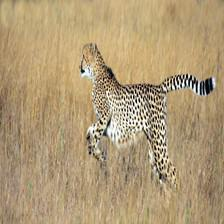

1/1 [==============================] - 1s 515ms/step
Predictions for acinonyx-jubatus_39_6808fa04.jpg:
('n02130308', 'cheetah', 0.92262876)


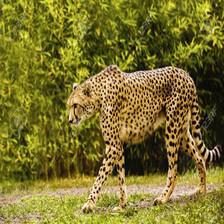

1/1 [==============================] - 0s 33ms/step
Predictions for acinonyx-jubatus_96_d0bb6474.jpg:
('n02130308', 'cheetah', 0.93088824)


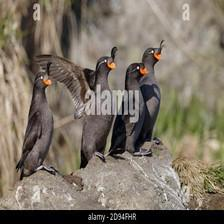

1/1 [==============================] - 0s 27ms/step
Predictions for aethia-cristatella_100_f0be0d50.jpg:
('n02486410', 'baboon', 0.26536325)


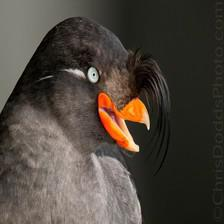

1/1 [==============================] - 0s 31ms/step
Predictions for aethia-cristatella_10_ac9edd8e.jpg:
('n01883070', 'wombat', 0.47723067)


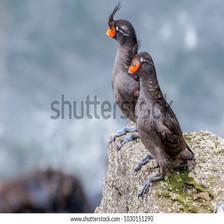

1/1 [==============================] - 0s 41ms/step
Predictions for aethia-cristatella_55_12383cc7.jpg:
('n01608432', 'kite', 0.322612)


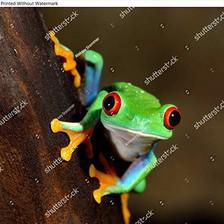

1/1 [==============================] - 0s 31ms/step
Predictions for agalychnis-callidryas_30_f03e8c56.jpg:
('n01644373', 'tree_frog', 0.9790146)


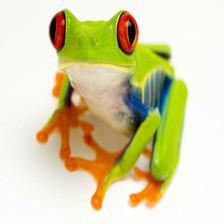

1/1 [==============================] - 0s 42ms/step
Predictions for agalychnis-callidryas_3_7219e9fc.jpg:
('n01644373', 'tree_frog', 0.8484157)


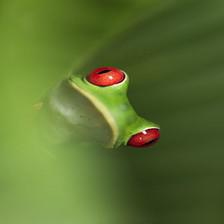

1/1 [==============================] - 0s 42ms/step
Predictions for agalychnis-callidryas_63_d690b0a9.jpg:
('n01644373', 'tree_frog', 0.3729913)


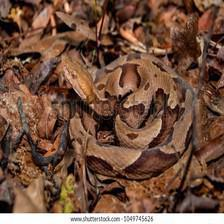

1/1 [==============================] - 0s 34ms/step
Predictions for agkistrodon-contortrix_22_2f3c6fcb.jpg:
('n01753488', 'horned_viper', 0.42636004)


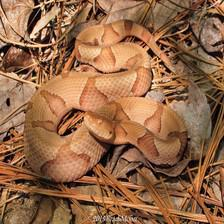

1/1 [==============================] - 0s 25ms/step
Predictions for agkistrodon-contortrix_50_2d624a08.jpg:
('n01756291', 'sidewinder', 0.65721613)


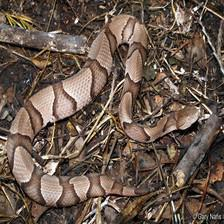

1/1 [==============================] - 0s 38ms/step
Predictions for agkistrodon-contortrix_69_7fb56b1f.jpg:
('n01756291', 'sidewinder', 0.22495678)


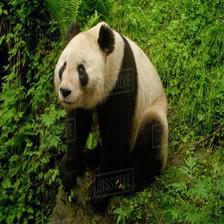

1/1 [==============================] - 0s 49ms/step
Predictions for ailuropoda-melanoleuca_40_39bc2c80.jpg:
('n02510455', 'giant_panda', 0.9771335)


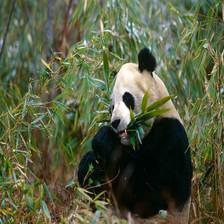

1/1 [==============================] - 0s 39ms/step
Predictions for ailuropoda-melanoleuca_83_482ed42e.jpg:
('n02510455', 'giant_panda', 0.91705996)


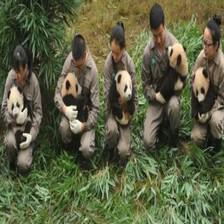

1/1 [==============================] - 0s 31ms/step
Predictions for ailuropoda-melanoleuca_97_ed3bf05f.jpg:
('n02110063', 'malamute', 0.20861806)


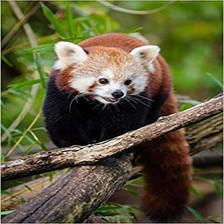

1/1 [==============================] - 0s 56ms/step
Predictions for ailurus-fulgens_2_1bc2ee34.jpg:
('n02509815', 'lesser_panda', 0.99271446)


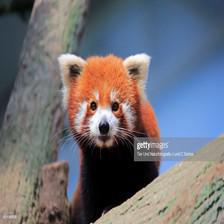

1/1 [==============================] - 0s 17ms/step
Predictions for ailurus-fulgens_74_152aae45.jpg:
('n02509815', 'lesser_panda', 0.999228)


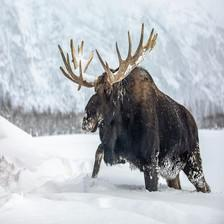

1/1 [==============================] - 0s 32ms/step
Predictions for alces-alces_85_dc7608a2.jpg:
('n02417914', 'ibex', 0.6308784)


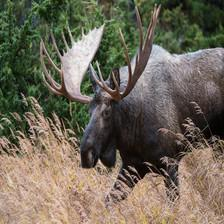

1/1 [==============================] - 0s 36ms/step
Predictions for alces-alces_96_f517f82f.jpg:
('n02408429', 'water_buffalo', 0.51734835)


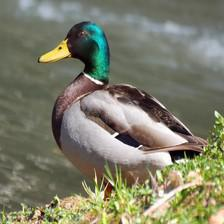

1/1 [==============================] - 0s 31ms/step
Predictions for anas-platyrhynchos_36_b067674b.jpg:
('n01847000', 'drake', 0.99950814)


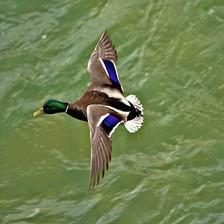

1/1 [==============================] - 0s 16ms/step
Predictions for anas-platyrhynchos_39_103b674c.jpg:
('n01847000', 'drake', 0.92842644)


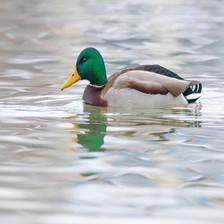

1/1 [==============================] - 0s 39ms/step
Predictions for anas-platyrhynchos_39_da516d1e.jpg:
('n01847000', 'drake', 0.9942007)


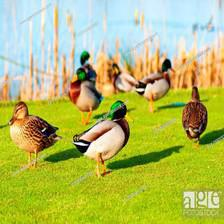

1/1 [==============================] - 0s 31ms/step
Predictions for anas-platyrhynchos_87_fcb2c3e4.jpg:
('n01798484', 'prairie_chicken', 0.6324363)


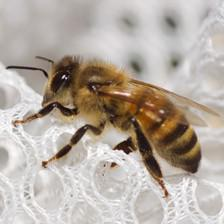

1/1 [==============================] - 0s 133ms/step
Predictions for apis-mellifera_2_a0020469.jpg:
('n02206856', 'bee', 0.98769325)


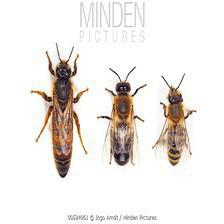

1/1 [==============================] - 0s 29ms/step
Predictions for apis-mellifera_59_994fb621.jpg:
('n02168699', 'long-horned_beetle', 0.26428634)


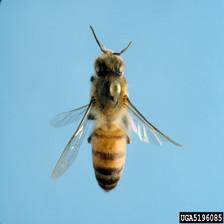

1/1 [==============================] - 0s 30ms/step
Predictions for apis-mellifera_63_2f8dfb2f.jpg:
('n02206856', 'bee', 0.92450136)


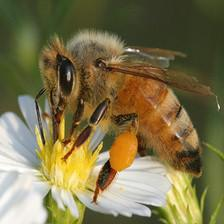

1/1 [==============================] - 0s 33ms/step
Predictions for apis-mellifera_65_527800b4.jpg:
('n02206856', 'bee', 0.99218506)


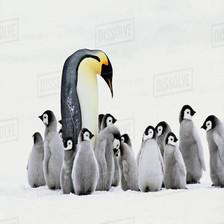

1/1 [==============================] - 0s 31ms/step
Predictions for aptenodytes-forsteri_17_f637c966.jpg:
('n02056570', 'king_penguin', 0.9930936)


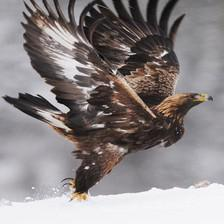

1/1 [==============================] - 0s 32ms/step
Predictions for aquila-chrysaetos_17_5c09604e.jpg:
('n01795545', 'black_grouse', 0.8568068)


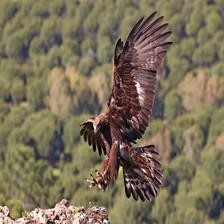

1/1 [==============================] - 0s 47ms/step
Predictions for aquila-chrysaetos_38_5e34ac2c.jpg:
('n01608432', 'kite', 0.8044683)


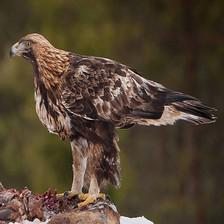

1/1 [==============================] - 0s 33ms/step
Predictions for aquila-chrysaetos_69_c613a5de.jpg:
('n01608432', 'kite', 0.7205099)


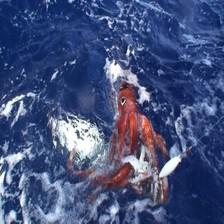

1/1 [==============================] - 0s 27ms/step
Predictions for architeuthis-dux_19_abd53826.jpg:
('n02077923', 'sea_lion', 0.31696177)


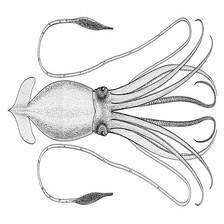

1/1 [==============================] - 0s 47ms/step
Predictions for architeuthis-dux_74_58553f5e.jpg:
('n03532672', 'hook', 0.44474474)


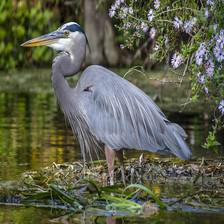

1/1 [==============================] - 0s 31ms/step
Predictions for ardea-herodias_34_905b13f6.jpg:
('n02009912', 'American_egret', 0.7641201)


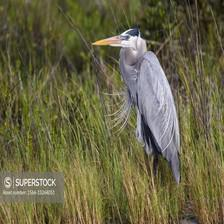

1/1 [==============================] - 0s 31ms/step
Predictions for ardea-herodias_42_3a1745c2.jpg:
('n02009912', 'American_egret', 0.5623953)


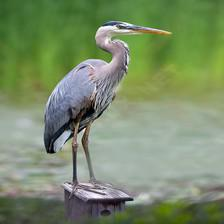

1/1 [==============================] - 0s 45ms/step
Predictions for ardea-herodias_7_dd5ad25b.jpg:
('n02009229', 'little_blue_heron', 0.84165794)


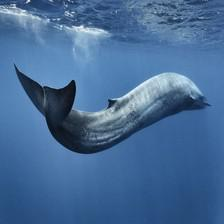

1/1 [==============================] - 0s 20ms/step
Predictions for balaenoptera-musculus_63_da53a3e3.jpg:
('n01496331', 'electric_ray', 0.31367004)


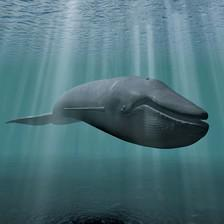

1/1 [==============================] - 0s 38ms/step
Predictions for balaenoptera-musculus_89_4981852e.jpg:
('n02074367', 'dugong', 0.858388)


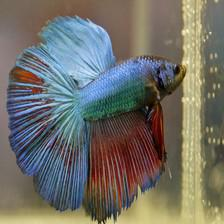

1/1 [==============================] - 0s 58ms/step
Predictions for betta-splendens_61_5aa6bb75.jpg:
('n01806143', 'peacock', 0.17678836)


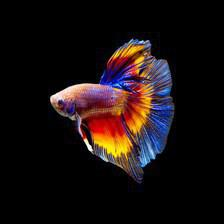

1/1 [==============================] - 0s 38ms/step
Predictions for betta-splendens_99_4fa95fbf.jpg:
('n01910747', 'jellyfish', 0.4108449)


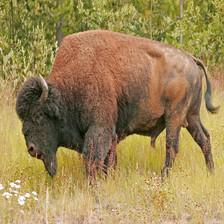

1/1 [==============================] - 0s 53ms/step
Predictions for bison-bison_95_9ad61dd3.jpg:
('n02410509', 'bison', 0.9984565)


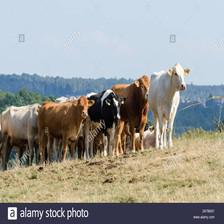

1/1 [==============================] - 0s 31ms/step
Predictions for bos-taurus_23_7c4894c4.jpg:
('n02403003', 'ox', 0.9799952)


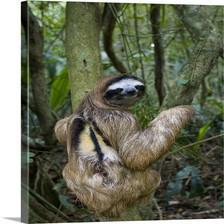

1/1 [==============================] - 0s 44ms/step
Predictions for bradypus-variegatus_25_4964085a.jpg:
('n02457408', 'three-toed_sloth', 0.9997919)


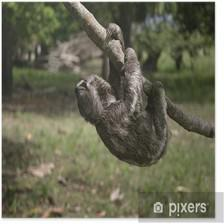

1/1 [==============================] - 0s 42ms/step
Predictions for bradypus-variegatus_95_af2d1305.jpg:
('n02457408', 'three-toed_sloth', 0.9623717)


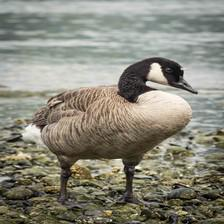

1/1 [==============================] - 0s 25ms/step
Predictions for branta-canadensis_0_e8d6fa34.jpg:
('n01855672', 'goose', 0.9998344)


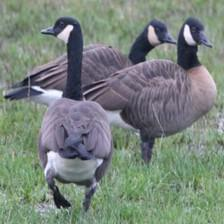

1/1 [==============================] - 0s 31ms/step
Predictions for branta-canadensis_10_1d1284d9.jpg:
('n01855672', 'goose', 0.9999893)


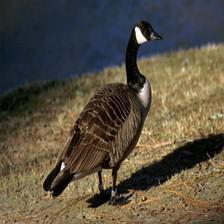

1/1 [==============================] - 0s 26ms/step
Predictions for branta-canadensis_43_78e84ad6.jpg:
('n01855672', 'goose', 0.97117877)


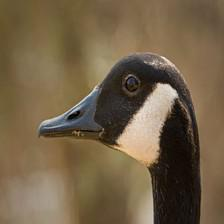

1/1 [==============================] - 0s 38ms/step
Predictions for branta-canadensis_46_7b6847f7.jpg:
('n01616318', 'vulture', 0.48726177)


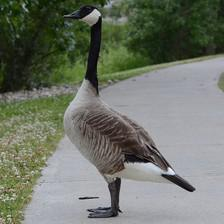

1/1 [==============================] - 0s 37ms/step
Predictions for branta-canadensis_98_a1bfdf45.jpg:
('n01855672', 'goose', 0.9988834)


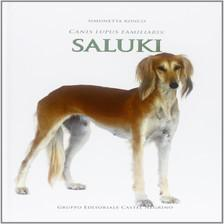

1/1 [==============================] - 0s 42ms/step
Predictions for canis-lupus-familiaris_100_7b006fff.jpg:
('n02091831', 'Saluki', 0.97128505)


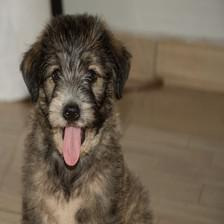

1/1 [==============================] - 0s 35ms/step
Predictions for canis-lupus-familiaris_34_2cc84f15.jpg:
('n02098105', 'soft-coated_wheaten_terrier', 0.31348202)


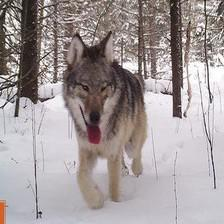

1/1 [==============================] - 0s 25ms/step
Predictions for canis-lupus_32_a792e125.jpg:
('n02114367', 'timber_wolf', 0.40139985)


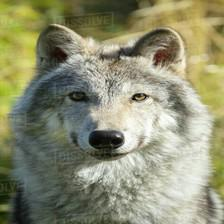

1/1 [==============================] - 0s 47ms/step
Predictions for canis-lupus_90_4747b729.jpg:
('n02114367', 'timber_wolf', 0.44913903)


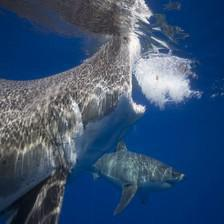

1/1 [==============================] - 0s 33ms/step
Predictions for carcharodon-carcharias_58_56039cba.jpg:
('n01484850', 'great_white_shark', 0.2597215)


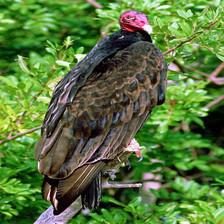

1/1 [==============================] - 0s 28ms/step
Predictions for cathartes-aura_52_7641272b.jpg:
('n01616318', 'vulture', 0.9464242)


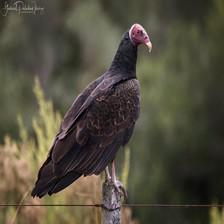

1/1 [==============================] - 0s 33ms/step
Predictions for cathartes-aura_54_33baeefd.jpg:
('n01616318', 'vulture', 0.93714315)


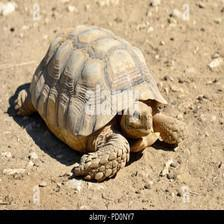

1/1 [==============================] - 0s 16ms/step
Predictions for centrochelys-sulcata_0_5dd580b8.jpg:
('n01667778', 'terrapin', 0.57134455)


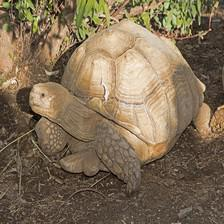

1/1 [==============================] - 0s 33ms/step
Predictions for centrochelys-sulcata_45_aad12856.jpg:
('n01667778', 'terrapin', 0.5394114)


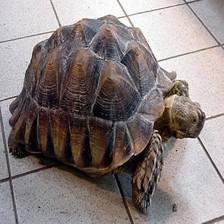

1/1 [==============================] - 0s 33ms/step
Predictions for centrochelys-sulcata_65_e91307af.jpg:
('n01667778', 'terrapin', 0.9229404)


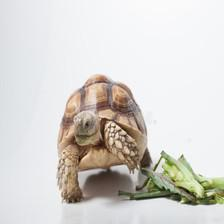

1/1 [==============================] - 0s 32ms/step
Predictions for centrochelys-sulcata_72_8f87c7f8.jpg:
('n03314780', 'face_powder', 0.20498726)


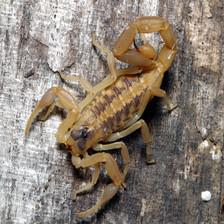

1/1 [==============================] - 0s 54ms/step
Predictions for centruroides-vittatus_23_75131621.jpg:
('n01770393', 'scorpion', 0.99989307)


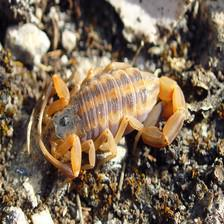

1/1 [==============================] - 0s 23ms/step
Predictions for centruroides-vittatus_29_4b4c488e.jpg:
('n01770393', 'scorpion', 0.99956363)


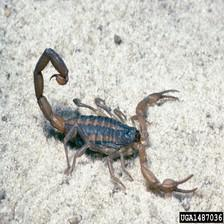

1/1 [==============================] - 0s 38ms/step
Predictions for centruroides-vittatus_66_0af87e15.jpg:
('n01770393', 'scorpion', 0.9999962)


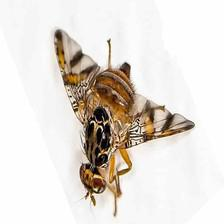

1/1 [==============================] - 0s 29ms/step
Predictions for ceratitis-capitata_29_7570ec08.jpg:
('n02206856', 'bee', 0.61275816)


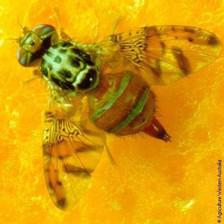

1/1 [==============================] - 0s 39ms/step
Predictions for ceratitis-capitata_92_1364760f.jpg:
('n01773549', 'barn_spider', 0.4864779)


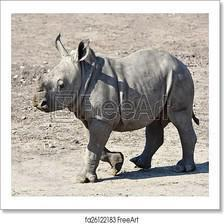

1/1 [==============================] - 0s 37ms/step
Predictions for ceratotherium-simum_18_4fcf8ad3.jpg:
('n02113978', 'Mexican_hairless', 0.37207073)


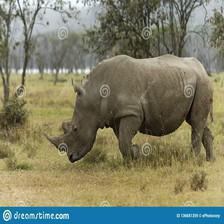

1/1 [==============================] - 0s 34ms/step
Predictions for ceratotherium-simum_63_40c313e1.jpg:
('n02403003', 'ox', 0.39419514)


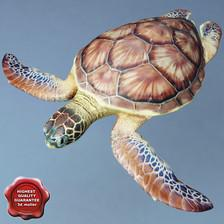

1/1 [==============================] - 0s 27ms/step
Predictions for chelonia-mydas_36_b0396960.jpg:
('n01664065', 'loggerhead', 0.9859038)


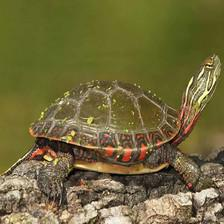

1/1 [==============================] - 0s 32ms/step
Predictions for chrysemys-picta_47_6d485f51.jpg:
('n01667114', 'mud_turtle', 0.5371202)


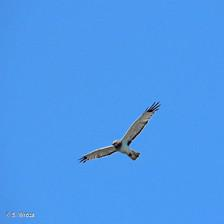

1/1 [==============================] - 0s 24ms/step
Predictions for circus-hudsonius_1_75b051b9.jpg:
('n01608432', 'kite', 0.5196097)


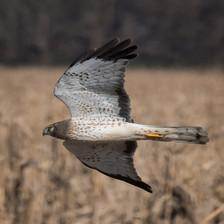

1/1 [==============================] - 0s 41ms/step
Predictions for circus-hudsonius_27_2229618f.jpg:
('n01608432', 'kite', 0.7326639)


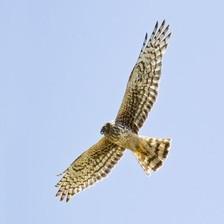

1/1 [==============================] - 0s 25ms/step
Predictions for circus-hudsonius_75_4717cf5b.jpg:
('n01608432', 'kite', 0.9390458)


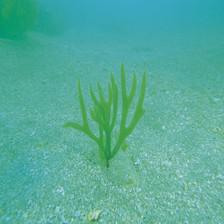

1/1 [==============================] - 0s 27ms/step
Predictions for codium-fragile_10_31588eaf.jpg:
('n09256479', 'coral_reef', 0.44974527)


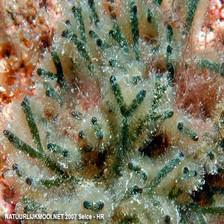

1/1 [==============================] - 0s 24ms/step
Predictions for codium-fragile_12_c0a5249b.jpg:
('n09256479', 'coral_reef', 0.45559672)


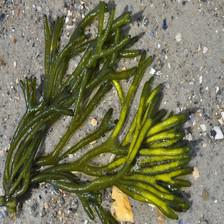

1/1 [==============================] - 0s 33ms/step
Predictions for codium-fragile_47_551ecef0.jpg:
('n01924916', 'flatworm', 0.6680387)


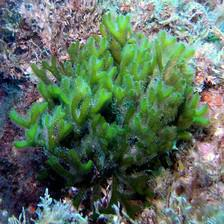

1/1 [==============================] - 0s 30ms/step
Predictions for codium-fragile_67_1794b760.jpg:
('n09256479', 'coral_reef', 0.9755442)


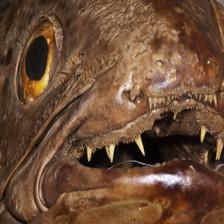

1/1 [==============================] - 0s 31ms/step
Predictions for coelacanthiformes_66_f94c3775.jpg:
('n01983481', 'American_lobster', 0.12115907)


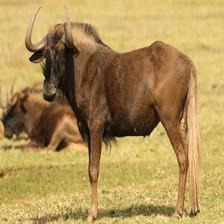

1/1 [==============================] - 0s 30ms/step
Predictions for connochaetes-gnou_99_e0251c96.jpg:
('n02422106', 'hartebeest', 0.7763369)


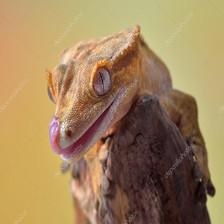

1/1 [==============================] - 0s 16ms/step
Predictions for correlophus-ciliatus_80_51d881c5.jpg:
('n01644900', 'tailed_frog', 0.41565686)


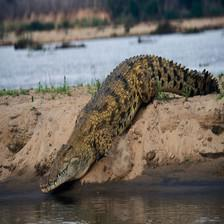

1/1 [==============================] - 0s 38ms/step
Predictions for crocodylus-niloticus_31_405f20cc.jpg:
('n01697457', 'African_crocodile', 0.99551904)


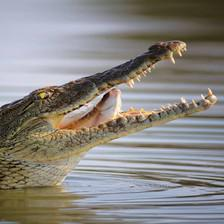

1/1 [==============================] - 0s 31ms/step
Predictions for crocodylus-niloticus_97_f3389453.jpg:
('n01697457', 'African_crocodile', 0.8063211)


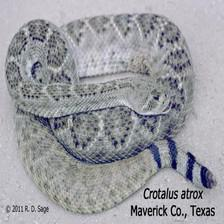

1/1 [==============================] - 0s 28ms/step
Predictions for crotalus-atrox_67_8b10c87d.jpg:
('n01756291', 'sidewinder', 0.49556154)


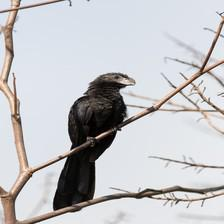

1/1 [==============================] - 0s 31ms/step
Predictions for crotophaga-sulcirostris_12_eab224ef.jpg:
('n01608432', 'kite', 0.5754647)


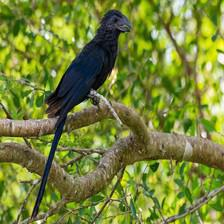

1/1 [==============================] - 0s 32ms/step
Predictions for crotophaga-sulcirostris_4_aef8ff60.jpg:
('n01824575', 'coucal', 0.9870843)


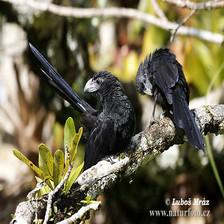

1/1 [==============================] - 0s 32ms/step
Predictions for crotophaga-sulcirostris_65_f4056077.jpg:
('n01824575', 'coucal', 0.7475616)


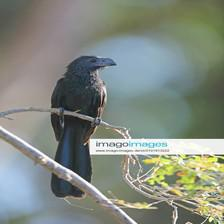

1/1 [==============================] - 0s 39ms/step
Predictions for crotophaga-sulcirostris_95_21c22c8e.jpg:
('n01843065', 'jacamar', 0.8949442)


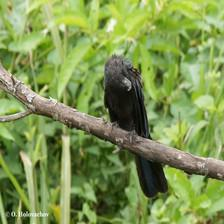

1/1 [==============================] - 0s 32ms/step
Predictions for crotophaga-sulcirostris_9_1b2241e6.jpg:
('n01824575', 'coucal', 0.91000694)


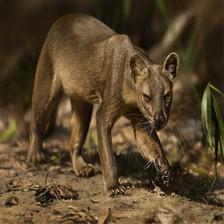

1/1 [==============================] - 0s 32ms/step
Predictions for cryptoprocta-ferox_23_0ebd2933.jpg:
('n02115913', 'dhole', 0.43472904)


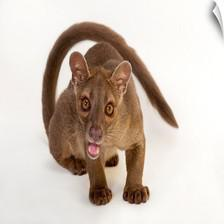

1/1 [==============================] - 0s 37ms/step
Predictions for cryptoprocta-ferox_48_8d2720be.jpg:
('n02124075', 'Egyptian_cat', 0.25703844)


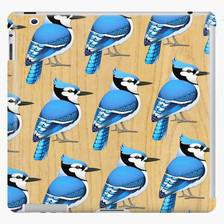

1/1 [==============================] - 0s 14ms/step
Predictions for cyanocitta-cristata_14_480dd35e.jpg:
('n04209239', 'shower_curtain', 0.7831107)


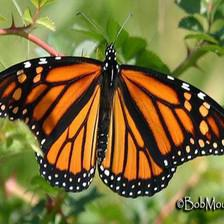

1/1 [==============================] - 0s 32ms/step
Predictions for danaus-plexippus_69_112eb9bd.jpg:
('n02279972', 'monarch', 0.99944896)


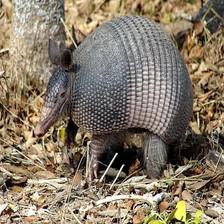

1/1 [==============================] - 0s 40ms/step
Predictions for dasypus-novemcinctus_38_fdc1b3a1.jpg:
('n02454379', 'armadillo', 0.99999917)


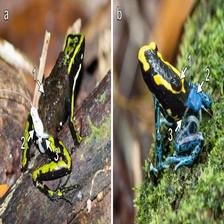

1/1 [==============================] - 0s 24ms/step
Predictions for dendrobatidae_35_74e5a404.jpg:
('n01629819', 'European_fire_salamander', 0.9793315)


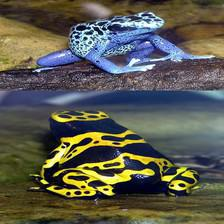

1/1 [==============================] - 0s 29ms/step
Predictions for dendrobatidae_35_8badd600.jpg:
('n01644900', 'tailed_frog', 0.4379343)


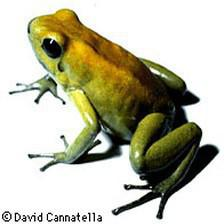

1/1 [==============================] - 0s 39ms/step
Predictions for dendrobatidae_80_a94803e3.jpg:
('n01644900', 'tailed_frog', 0.9369592)


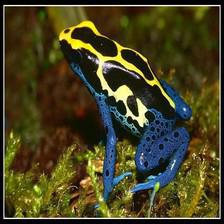

1/1 [==============================] - 0s 46ms/step
Predictions for dendrobatidae_87_42d7b2ac.jpg:
('n01644900', 'tailed_frog', 0.67730904)


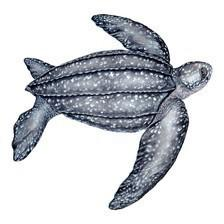

1/1 [==============================] - 0s 42ms/step
Predictions for dermochelys-coriacea_40_fcd3d1b9.jpg:
('n01665541', 'leatherback_turtle', 0.9995035)


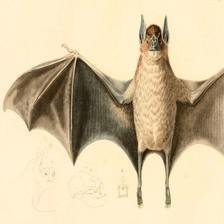

1/1 [==============================] - 0s 29ms/step
Predictions for desmodus-rotundus_11_215702cc.jpg:
('n02443484', 'black-footed_ferret', 0.076791584)


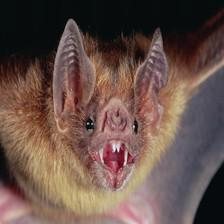

1/1 [==============================] - 0s 32ms/step
Predictions for desmodus-rotundus_74_cc2bea80.jpg:
('n02119789', 'kit_fox', 0.52879226)


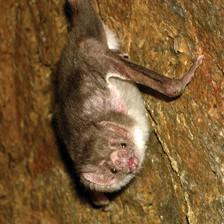

1/1 [==============================] - 0s 31ms/step
Predictions for desmodus-rotundus_83_57055f0a.jpg:
('n01883070', 'wombat', 0.90235376)


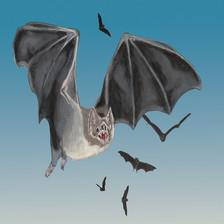

1/1 [==============================] - 0s 33ms/step
Predictions for desmodus-rotundus_89_d25d2b13.jpg:
('n03787032', 'mortarboard', 0.28265718)


In [72]:
# Realizar predicciones sobre todas las imágenes en la carpeta
for image_file in image_files:
    if predict_and_check(image_file,0.8): 
        acceptable_predictions_count += 1

In [73]:
# Mostrar el resultado final
print(f"Total number of acceptable predictions (>= 80% probability): {acceptable_predictions_count} out of {len(image_files)}")

Total number of acceptable predictions (>= 80% probability): 48 out of 100


In [74]:
acceptable_predictions_count

48

In [75]:
results_tag=[] #Creacion de listas para almacenar las etiquetas y la precision otorgadas por el predict de mobilenet.
results_acc=[]
for image_file in image_files:
    img_path='Imagenes_para_exposiciones_Grupo_2/'
    preprocessed_image = prepare_image(image_file, img_path)
    predictions = mobile.predict(preprocessed_image)
    result = imagenet_utils.decode_predictions(predictions)
    results_tag.append(result[0][0][1])
    results_acc.append(result[0][0][2])

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


In [76]:
animal_names = [ #Lista que contiene los nombres comunes de los animales de las imagenes en lugar del nombre cientifico
    'Cheetah',
    'Cheetah',
    'Crested auklet',
    'Crested auklet',
    'Crested auklet',
    'Red-eyed tree frog',
    'Red-eyed tree frog',
    'Red-eyed tree frog',
    'Copperhead snake',
    'Copperhead snake',
    'Copperhead snake',
    'Giant panda',
    'Giant panda',
    'Giant panda',
    'Red panda',
    'Red panda',
    'Moose',
    'Moose',
    'Mallard duck',
    'Mallard duck',
    'Mallard duck',
    'Mallard duck',
    'Honey bee',
    'Honey bee',
    'Honey bee',
    'Honey bee',
    'Emperor penguin',
    'Golden eagle',
    'Golden eagle',
    'Golden eagle',
    'Giant squid',
    'Giant squid',
    'Great blue heron',
    'Great blue heron',
    'Great blue heron',
    'Blue whale',
    'Blue whale',
    'Siamese fighting fish',
    'Siamese fighting fish',
    'American bison',
    'Cattle',
    'Three-toed sloth',
    'Three-toed sloth',
    'Canada goose',
    'Canada goose',
    'Canada goose',
    'Canada goose',
    'Canada goose',
    'Domestic dog',
    'Domestic dog',
    'Gray wolf',
    'Gray wolf',
    'Great white shark',
    'Turkey vulture',
    'Turkey vulture',
    'African spurred tortoise',
    'African spurred tortoise',
    'African spurred tortoise',
    'African spurred tortoise',
    'Striped bark scorpion',
    'Striped bark scorpion',
    'Striped bark scorpion',
    'Mediterranean fruit fly',
    'Mediterranean fruit fly',
    'White rhinoceros',
    'White rhinoceros',
    'Green sea turtle',
    'Painted turtle',
    'Northern harrier',
    'Northern harrier',
    'Northern harrier',
    'Green algae',
    'Green algae',
    'Green algae',
    'Green algae',
    'Coelacanth',
    'Black wildebeest',
    'Crested gecko',
    'Nile crocodile',
    'Nile crocodile',
    'Western diamondback rattlesnake',
    'Groove-billed ani',
    'Groove-billed ani',
    'Groove-billed ani',
    'Groove-billed ani',
    'Groove-billed ani',
    'Fossa',
    'Fossa',
    'Blue jay',
    'Monarch butterfly',
    'Nine-banded armadillo',
    'Poison dart frog',
    'Poison dart frog',
    'Poison dart frog',
    'Poison dart frog',
    'Leatherback sea turtle',
    'Common vampire bat',
    'Common vampire bat',
    'Common vampire bat',
    'Common vampire bat'
]

In [88]:
unique_results_tags=set(results_tag)
print('Numero de clases unicas reconocidas por la mobile net :',len(unique_results_tags))
print('Numero de clases unicas en el conjunto de imagenes : ',len(unique_labels))
print('Cantidad de predicciones definidas como aceptables con un margen del 80 % :',acceptable_predictions_count)

Numero de clases unicas reconocidas por la mobile net : 60
Numero de clases unicas en el conjunto de imagenes :  44
Cantidad de predicciones definidas como aceptables con un margen del 80 % : 48


In [78]:
dic_acc={'100-80':0 ,'80-60':0,'60-40':0,'40-20':0,'20-0':0}
for i in range(len(animal_names)):
    print('Nombre cientifico del animal',labels[i],'nombre comun del animal',animal_names[i])
    print('Clase asignada por el modelo MobileNet ',results_tag[i])
    print('Precision de la prediccion',round(results_acc[i]*100,4),'%')
    if results_acc[i] >=0.8:
        dic_acc['100-80']=dic_acc['100-80']+1
    elif 0.8 > results_acc[i] >=0.6:
        dic_acc['80-60'] +=1
    elif 0.6>results_acc[i] >=0.4:
        dic_acc['60-40'] +=1
    elif 0.4 >results_acc[i] >=0.2:
        dic_acc['40-20'] +=1
    elif 0.2>results_acc[i]: 
        dic_acc['20-0'] +=1
    print('')

Nombre cientifico del animal acinonyx-jubatus nombre comun del animal Cheetah
Clase asignada por el modelo MobileNet  cheetah
Precision de la prediccion 92.2629 %

Nombre cientifico del animal acinonyx-jubatus nombre comun del animal Cheetah
Clase asignada por el modelo MobileNet  cheetah
Precision de la prediccion 93.0888 %

Nombre cientifico del animal aethia-cristatella nombre comun del animal Crested auklet
Clase asignada por el modelo MobileNet  baboon
Precision de la prediccion 26.5363 %

Nombre cientifico del animal aethia-cristatella nombre comun del animal Crested auklet
Clase asignada por el modelo MobileNet  wombat
Precision de la prediccion 47.7231 %

Nombre cientifico del animal aethia-cristatella nombre comun del animal Crested auklet
Clase asignada por el modelo MobileNet  kite
Precision de la prediccion 32.2612 %

Nombre cientifico del animal agalychnis-callidryas nombre comun del animal Red-eyed tree frog
Clase asignada por el modelo MobileNet  tree_frog
Precision de l

In [79]:
results_tag

['cheetah',
 'cheetah',
 'baboon',
 'wombat',
 'kite',
 'tree_frog',
 'tree_frog',
 'tree_frog',
 'horned_viper',
 'sidewinder',
 'sidewinder',
 'giant_panda',
 'giant_panda',
 'malamute',
 'lesser_panda',
 'lesser_panda',
 'ibex',
 'water_buffalo',
 'drake',
 'drake',
 'drake',
 'prairie_chicken',
 'bee',
 'long-horned_beetle',
 'bee',
 'bee',
 'king_penguin',
 'black_grouse',
 'kite',
 'kite',
 'sea_lion',
 'hook',
 'American_egret',
 'American_egret',
 'little_blue_heron',
 'electric_ray',
 'dugong',
 'peacock',
 'jellyfish',
 'bison',
 'ox',
 'three-toed_sloth',
 'three-toed_sloth',
 'goose',
 'goose',
 'goose',
 'vulture',
 'goose',
 'Saluki',
 'soft-coated_wheaten_terrier',
 'timber_wolf',
 'timber_wolf',
 'great_white_shark',
 'vulture',
 'vulture',
 'terrapin',
 'terrapin',
 'terrapin',
 'face_powder',
 'scorpion',
 'scorpion',
 'scorpion',
 'bee',
 'barn_spider',
 'Mexican_hairless',
 'ox',
 'loggerhead',
 'mud_turtle',
 'kite',
 'kite',
 'kite',
 'coral_reef',
 'coral_reef',


In [80]:
sorted_results_tag=results_tag.copy()
sorted_results_tag.sort()
sorted_results_tag

['African_crocodile',
 'African_crocodile',
 'American_egret',
 'American_egret',
 'American_lobster',
 'Egyptian_cat',
 'European_fire_salamander',
 'Mexican_hairless',
 'Saluki',
 'armadillo',
 'baboon',
 'barn_spider',
 'bee',
 'bee',
 'bee',
 'bee',
 'bison',
 'black-footed_ferret',
 'black_grouse',
 'cheetah',
 'cheetah',
 'coral_reef',
 'coral_reef',
 'coral_reef',
 'coucal',
 'coucal',
 'coucal',
 'dhole',
 'drake',
 'drake',
 'drake',
 'dugong',
 'electric_ray',
 'face_powder',
 'flatworm',
 'giant_panda',
 'giant_panda',
 'goose',
 'goose',
 'goose',
 'goose',
 'great_white_shark',
 'hartebeest',
 'hook',
 'horned_viper',
 'ibex',
 'jacamar',
 'jellyfish',
 'king_penguin',
 'kit_fox',
 'kite',
 'kite',
 'kite',
 'kite',
 'kite',
 'kite',
 'kite',
 'leatherback_turtle',
 'lesser_panda',
 'lesser_panda',
 'little_blue_heron',
 'loggerhead',
 'long-horned_beetle',
 'malamute',
 'monarch',
 'mortarboard',
 'mud_turtle',
 'ox',
 'ox',
 'peacock',
 'prairie_chicken',
 'scorpion',
 '

In [81]:
dic_acc

{'100-80': 48, '80-60': 12, '60-40': 22, '40-20': 15, '20-0': 3}

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

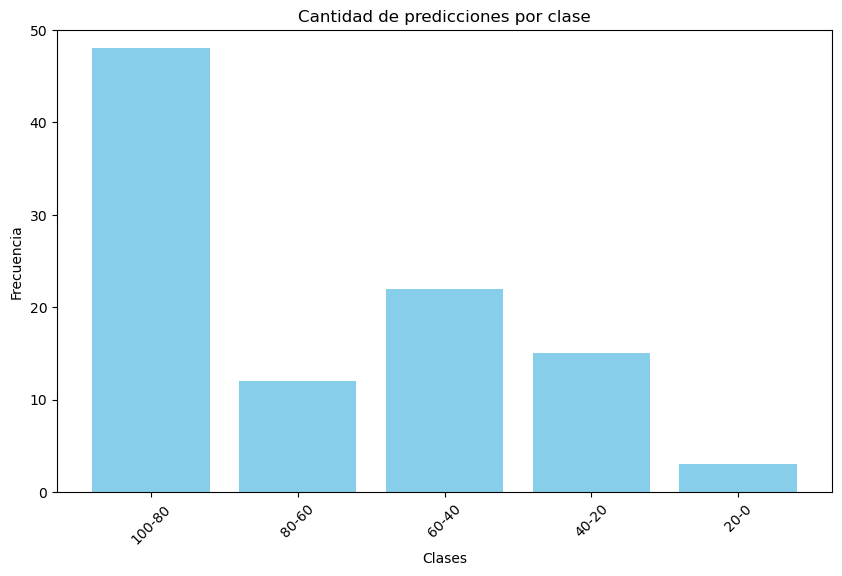

In [86]:
labels = list(dic_acc.keys())
values = list(dic_acc.values())

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Cantidad de predicciones por clase')
plt.ylim(0, 50) 
plt.xticks(rotation=45)  

# Mostrar el histograma
plt.show()

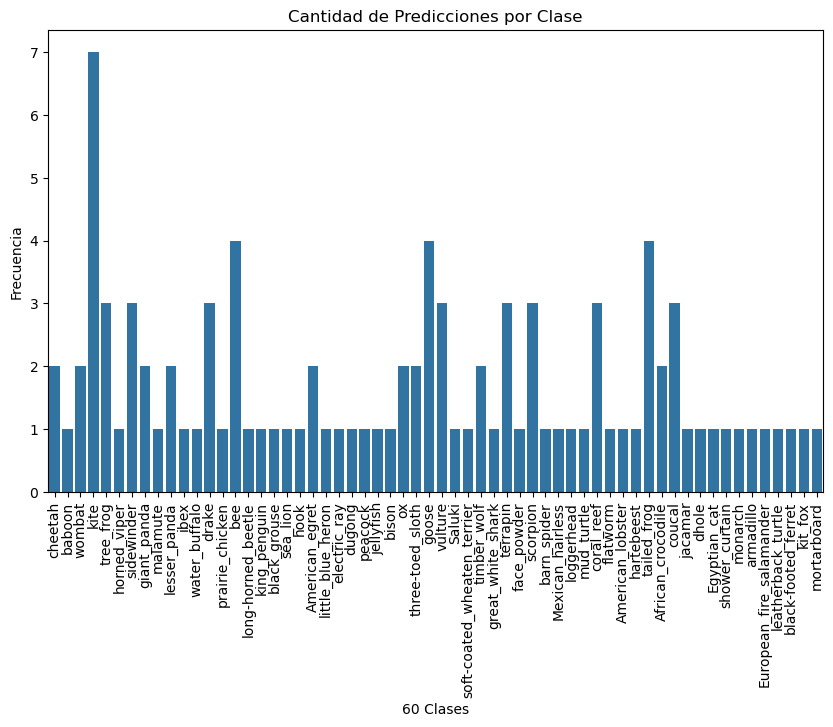

In [90]:

# Distribución de predicciones
plt.figure(figsize=(10, 6))
sns.countplot(x=results_tag)
plt.title("Cantidad de Predicciones por Clase")
plt.xlabel("60 Clases")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()


<a id="seccion-6"></a>

## **Análisis de Resultados**

### **Precisión del Modelo:**


### **Análisis de Errores:**

* Muchos de los errores de clasificación ocurrieron en clases similares, como 'cat' y 'tiger_cat', lo cual sugiere que el modelo tuvo dificultades para distinguir entre estas clases debido a características visuales similares.

### **Clases Identificadas:**

* Las clases más frecuentemente identificadas con precisión fueron 'kite' y 'bee', lo cual es consistente con la distribución del conjunto de datos, que contiene un alto número de imágenes de estas categorías.

### **Concluciones**

* MobileNet demostró ser eficaz en la mayoría de las clases, pero tuvo dificultades en distinguir entre clases visualmente similares. La precisión general fue satisfactoria.

[Volver al índice](#indice)  